In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import networkx as nx

In [18]:
G = nx.Graph()

In [19]:
df_se = pd.read_csv('./sheep_data/sheep_edges.csv')
df_sa = pd.read_csv('./sheep_data/sheep_age.csv')

In [22]:
G=nx.from_pandas_dataframe(df_se, 'source', 'target', ['weight'])
#G=nx.from_pandas_dataframe(df_se, 'source', 'target')

In [23]:
# Add in node age attr
for k,v in pd.Series(df_sa.age.values, index=df_sa.id).to_dict().items():
    G.node[k]['age'] = v

In [64]:
# Add in node dominated attr
for id in (set(df_se['source'].unique())).union(set(df_se['target'].unique())):
    G.node[id]['dominate'] = df_se[df_se['source'] == id].shape[0]


In [70]:
G.nodes().data()

NodeDataView({1: {'age': 8, 'dominate': 5}, 2: {'age': 8, 'dominate': 14}, 3: {'age': 4, 'dominate': 18}, 4: {'age': 7, 'dominate': 17}, 5: {'age': 8, 'dominate': 2}, 6: {'age': 3, 'dominate': 0}, 7: {'age': 5, 'dominate': 16}, 8: {'age': 4, 'dominate': 14}, 9: {'age': 7, 'dominate': 16}, 10: {'age': 9, 'dominate': 3}, 11: {'age': 6, 'dominate': 10}, 12: {'age': 4, 'dominate': 7}, 13: {'age': 9, 'dominate': 14}, 14: {'age': 1, 'dominate': 11}, 15: {'age': 9, 'dominate': 11}, 16: {'age': 9, 'dominate': 9}, 17: {'age': 4, 'dominate': 7}, 18: {'age': 1, 'dominate': 10}, 19: {'age': 1, 'dominate': 7}, 20: {'age': 3, 'dominate': 2}, 21: {'age': 3, 'dominate': 1}, 22: {'age': 1, 'dominate': 16}, 23: {'age': 7, 'dominate': 9}, 24: {'age': 1, 'dominate': 6}, 25: {'age': 9, 'dominate': 6}, 26: {'age': 3, 'dominate': 3}, 27: {'age': 4, 'dominate': 1}, 28: {'age': 9, 'dominate': 15}})

In [83]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 7), (2, 22), (2, 28), (2, 8), (2, 9), (2, 4), (2, 12), (2, 13), (2, 15), (2, 23), (2, 24), (2, 26), (2, 27), (2, 21), (2, 3), (2, 16), (3, 7), (3, 22), (3, 28), (3, 8), (3, 9), (3, 4), (3, 14), (3, 15), (3, 23), (3, 16), (3, 18), (3, 24), (3, 25), (3, 5), (3, 19), (3, 26), (3, 20), (3, 21), (3, 6), (3, 11), (3, 13), (4, 7), (4, 22), (4, 8), (4, 9), (4, 11), (4, 12), (4, 15), (4, 23), (4, 16), (4, 18), (4, 24), (4, 25), (4, 5), (4, 19), (4, 26), (4, 20), (4, 27), (4, 21), (4, 6), (4, 14), (5, 11), (5, 12), (5, 16), (5, 21), (6, 22), (6, 28), (6, 8), (6, 9), (6, 13), (6, 14), (6, 15), (6, 23), (6, 16), (6, 17), (6, 18), (6, 24), (6, 25), (6, 19), (6, 26), (6, 21), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19), (7, 20), (7, 21), (8, 22), (8, 9), (8, 13), (8, 15), (8, 23), (8, 16), (8, 17), (8, 18), (8, 24), (8, 19), (8, 26), (8, 21), (9, 22), (9, 28), (9, 11), (9, 13), (9, 14),

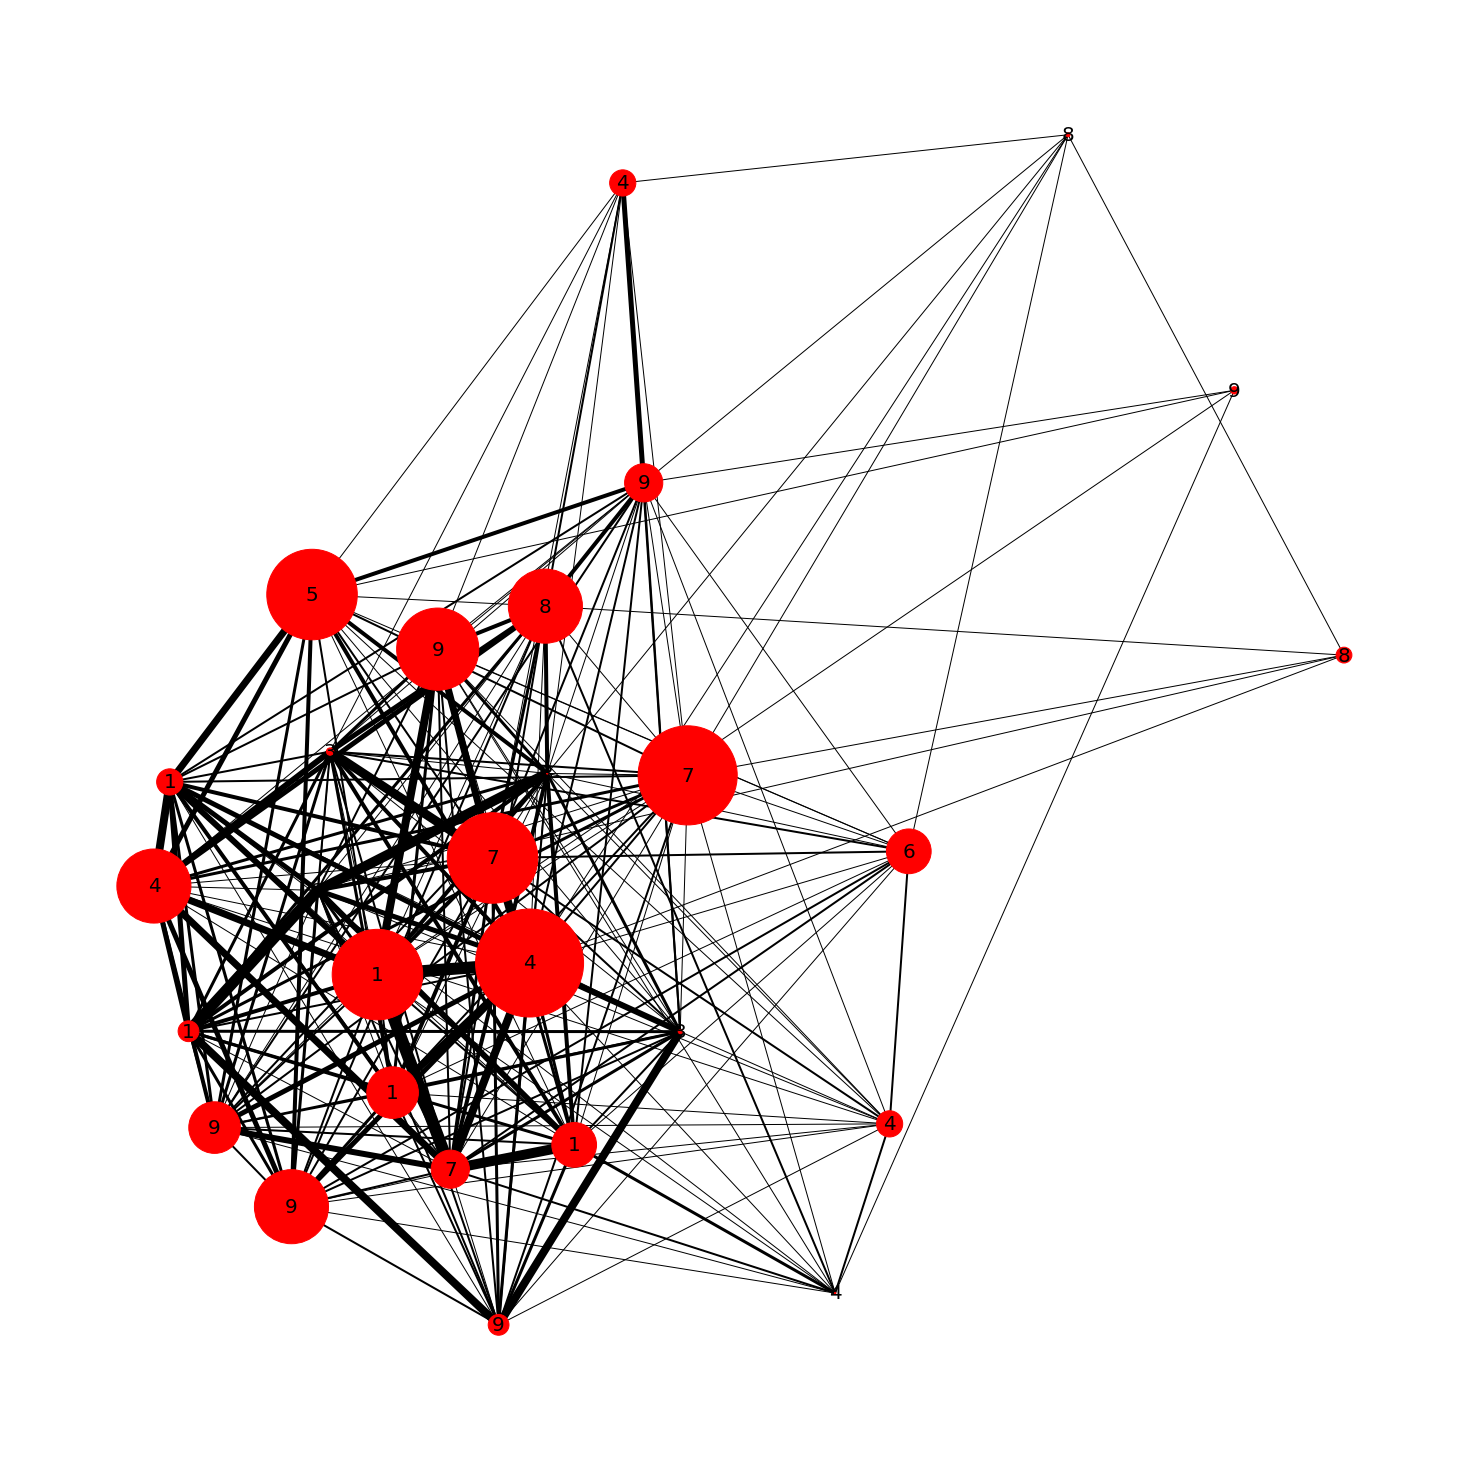

In [87]:
ps=nx.spring_layout(G,scale=3)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
plt.figure(figsize=(20,20))
#nx.draw(G, pos=ps, edgelist=edges, width=weights, nodelist=dict(nx.degree(G, weight='weight')).keys(), node_size=[v * v for v in dict(nx.degree(G, weight='weight')).values()])
nx.draw(G, pos=ps, edgelist=edges, width=weights, nodelist=nx.get_node_attributes(G,'dominate').keys(), node_size=[v * v * v * 2 for v in nx.get_node_attributes(G,'dominate').values()])
nx.draw_networkx_labels(G,pos=ps,labels=nx.get_node_attributes(G,'age'), font_size=20,font_family='sans-serif')
plt.show()

In [86]:

from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models.graphs import from_networkx

#G=nx.karate_club_graph()

plot = figure(title="Networkx Integration Demonstration", x_range=(-1.1,1.1), y_range=(-1.1,1.1),\
              tools="", toolbar_location=None)

graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

output_file("networkx_graph.html")
show(plot)

TypeError: keys must be a string

In [16]:
nx.karate_club_graph().edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])